In [17]:
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

import scope.tbutils as tbutils
from scope.tbutils import ExperimentLoader

tf.logging.set_verbosity(tf.logging.ERROR)

logdir = 'logs'
el = ExperimentLoader(logdir)
events = el.events(el.runs(), ['epoch', 'loss', 'acc'])

for run in events:
    print('{}:'.format(run))
    print(events[run])
    print('')

interp-mnist-relu-fc128,128-sgd-nobatchnorm-nodropout-lr0.1-batch64-2018-11-27--11-00-55:
           wall_time  epoch      loss       acc
step                                           
0       1.543345e+09    0.0  2.358375  0.098233
938     1.543345e+09    1.0  0.184735  0.945250
1876    1.543345e+09    2.0  0.121005  0.965100
2814    1.543345e+09    3.0  0.087644  0.974833
3752    1.543345e+09    4.0  0.065987  0.980583
4690    1.543345e+09    5.0  0.051670  0.985400
5628    1.543345e+09    6.0  0.042480  0.987567
6566    1.543345e+09    7.0  0.035560  0.989550
7504    1.543345e+09    8.0  0.031415  0.990650
8442    1.543345e+09    9.0  0.027504  0.992117
9380    1.543345e+09   10.0  0.024001  0.993000
10318   1.543345e+09   11.0  0.021682  0.993533
11256   1.543345e+09   12.0  0.018926  0.994350
12194   1.543345e+09   13.0  0.016357  0.995117
13132   1.543345e+09   14.0  0.014005  0.996017
14070   1.543345e+09   15.0  0.011983  0.996700
15008   1.543346e+09   16.0  0.010151  0.99738

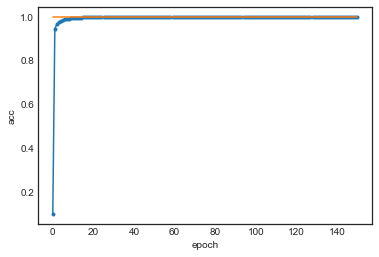

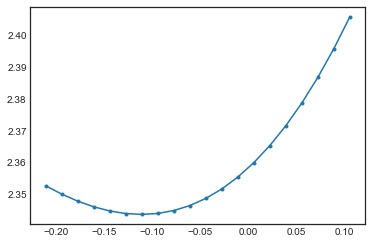

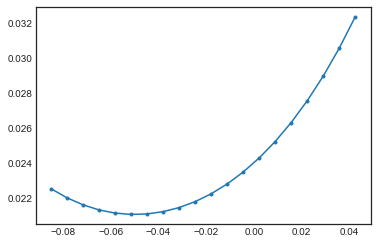

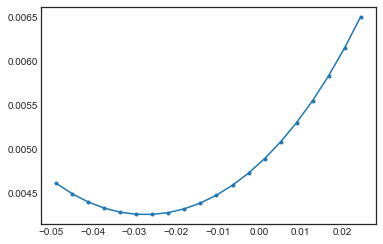

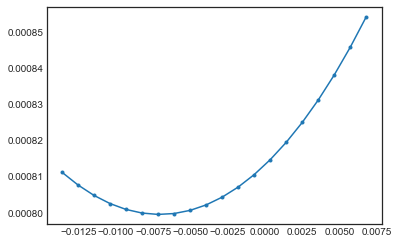

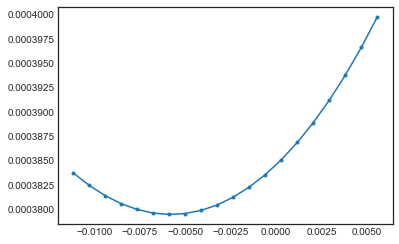

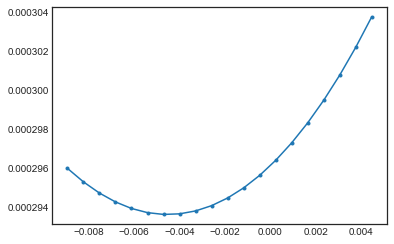

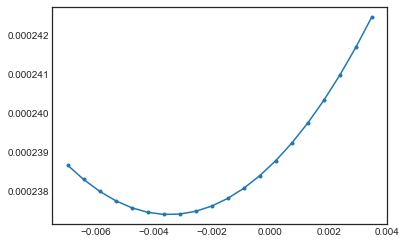

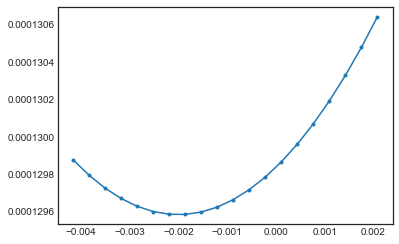

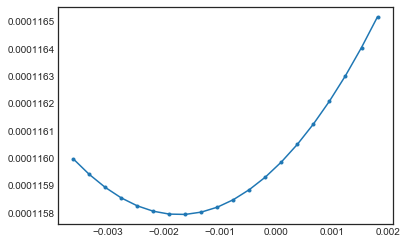

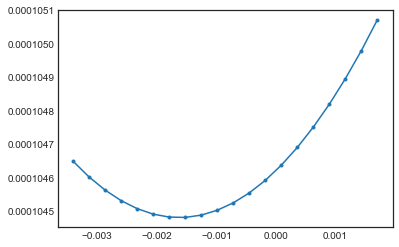

In [28]:
interp_tag = 'interpolation/loss_in_evec_dir_9'
run = el.runs()[0]

#print('Tags:')
#for t in el.tags(run):
#    print('\t', t)

events = el.single_run_events(run, tags=['epoch', 'loss', 'acc', interp_tag])

plt.figure()
plt.plot(
    events['epoch'], events['acc'], '.-',
    events['epoch'], [1 for e in events['epoch']], '-')
plt.ylabel('acc')
plt.xlabel('epoch')

i = 1
num_cols = 1
num_rows = len(events)

for step, row in events.iterrows():
    loss_interp = row[interp_tag]
    if type(loss_interp) is np.ndarray:
        plt.figure()
        plt.plot(loss_interp[0], loss_interp[1], '.-')
    #ax = plt.subplot(num_rows, num_cols, i)
    #ax.plot(loss_interp[0], loss_interp[1], '.-')
    #ax.set_xlabel('delta')
    #ax.set_ylabel('loss')
    #ax.set_title(run)
    #i += 1
    
#plt.tight_layout()


In [35]:
events[events['epoch'] < 50][['epoch', 'acc']]

,epoch,acc
step,,
0,0.0,0.098233
938,1.0,0.945250
1876,2.0,0.965100
2814,3.0,0.974833
3752,4.0,0.980583
4690,5.0,0.985400
5628,6.0,0.987567
6566,7.0,0.989550
7504,8.0,0.990650


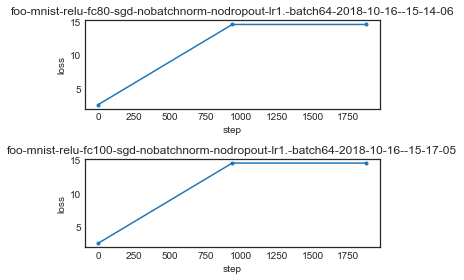

In [2]:
fig = plt.figure()

#num_plots = len(events)
#num_cols = 2
#num_rows = (num_plots + 1) // num_plots

num_cols = 1
num_rows = len(events)

for i, run in enumerate(events.keys()):
    data = events[run].reset_index()
    ax = plt.subplot(num_rows, num_cols, i + 1)
    ax.plot(data.step, data.loss, '.-')
    ax.set_xlabel('step')
    ax.set_ylabel('loss')
    ax.set_title(run)
    #events[run].reset_index().plot(x='step', y='loss', title=run)

plt.tight_layout()


In [5]:
el.events({'fc': '80'}, tags=['loss'])

loss


{'foo-mnist-relu-fc80-sgd-nobatchnorm-nodropout-lr1.-batch64-2018-10-16--15-14-06':          wall_time       loss
 step                         
 0     1.539728e+09   2.578223
 938   1.539728e+09  14.528330
 1876  1.539728e+09  14.528330}